In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("train.csv")
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
# check data size 
df.shape

(165034, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
# check missing value 
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# drop columns unrelated 
df.drop(['id','Surname'],axis=1,inplace=True)

In [8]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# Encoding use LabelEncoder
for col in df.columns:
    df[col]=LabelEncoder().fit_transform(df[col])
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,9815,274,0,1,16,3,0,1,1,0,52408,0
1,16380,233,0,1,16,1,0,1,1,1,5312,0
2,12091,284,0,1,24,10,0,1,1,0,53528,0
3,15700,187,0,1,17,2,26366,0,1,1,15979,0
4,18146,322,2,1,16,5,0,1,1,1,1630,0


In [12]:
# split the data 
X=df.drop("Exited",axis=1)
y=df['Exited']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [14]:
regression=LogisticRegression()
regression.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred=regression.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
y_pred.shape

(33007,)

In [22]:
print("accuracy_score : ",accuracy_score(y_test,y_pred))

accuracy_score :  0.7812888175235556


In [23]:
print("confusion_matrix :\n ",confusion_matrix(y_test,y_pred))

confusion_matrix :
  [[24926  1126]
 [ 6093   862]]


<Axes: >

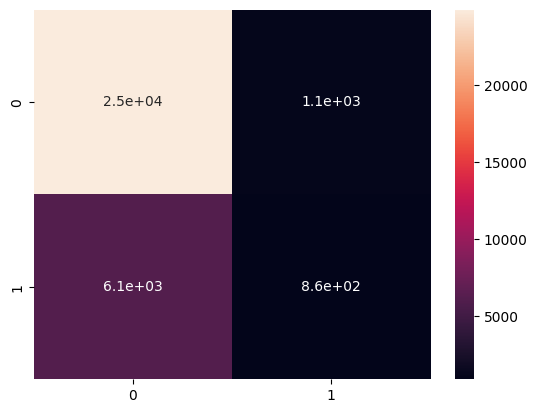

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [24]:
print('classification_report : \n',classification_report(y_test,y_pred))

classification_report : 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87     26052
           1       0.43      0.12      0.19      6955

    accuracy                           0.78     33007
   macro avg       0.62      0.54      0.53     33007
weighted avg       0.73      0.78      0.73     33007

